### Description:
**In this notebook, we are going to predict whether a person's income is above 50k or below 50k using various features like age, education, and occupation.**

**The dataset we are going to use is the Adult census income dataset which contains about 32561 rows and 15 features that can be downloaded here.**

**The dataset contains the labels which we have to predict and the labels are discrete and binary. So the problem we have is a Supervised Classification type.**

In [1]:
## import required Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

# to visualize all the columns in the dataframe
pd.pandas.set_option('display.max_columns',None)


In [2]:
#import train dataset from UCI links

train_set= pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data', header = None)


# Assign column name:
col_labels = ['age', 'workclass', 'fnlwgt', 'education', 'education_num','marital_status', 'occupation','relationship', 
              'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_country', 'wage_class']
train_set.columns = col_labels

train_set.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [3]:
## Description about the dataframe:

print("Variable present in the DataFrame",train_set.columns)
print("\n",70*"=")
print("Information about DataFrame: ",train_set.info())
print("\n",70*"=")
print("Shape of the DataFrame ROWS {a} and COLUMNS {b} ".format(a=train_set.shape[0],b=train_set.shape[1]))
print("\n",70*"=")

Variable present in the DataFrame Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'wage_class'],
      dtype='object')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 n

In [4]:
# Viewing the data statistics
print("Summary about the numerical dataset:")
print("======"*15)
train_set.describe()


Summary about the numerical dataset:


,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [5]:
print("Summary about the categorical dataset:")
print("======"*15)
train_set.describe(include="O")

Summary about the categorical dataset:


,workclass,education,marital_status,occupation,relationship,race,sex,native_country,wage_class
count,32561,32561,32561,32561,32561,32561,32561,32561,32561
unique,9,16,7,15,6,5,2,42,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,22696,10501,14976,4140,13193,27816,21790,29170,24720


In [6]:
#find out numerical and categorical features for train set

numerical_features=[feature for feature in train_set.columns if train_set[feature].dtype!='O']
categorical_features=[feature for feature in  train_set.columns if  train_set[feature].dtype=='O' and feature!='wage_class']

print('categorical features: ''\n',categorical_features)
print('numerical features: ''\n',numerical_features)

categorical features: 
 ['workclass', 'education', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'native_country']
numerical features: 
 ['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week']


In [7]:
numerical_features = train_set.select_dtypes(include='number')
categorical_features = train_set.select_dtypes(include='object')

numerical_features.head()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
0,39,77516,13,2174,0,40
1,50,83311,13,0,0,13
2,38,215646,9,0,0,40
3,53,234721,7,0,0,40
4,28,338409,13,0,0,40


In [8]:
categorical_features.head()

,workclass,education,marital_status,occupation,relationship,race,sex,native_country,wage_class
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States,<=50K
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,<=50K
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States,<=50K
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States,<=50K
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba,<=50K


In [9]:
#Check for missing values

print("Number of missing values each columns: ","\n",train_set.isnull().sum())  

# No missing value presents
  

Number of missing values each columns:  
 age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
wage_class        0
dtype: int64


In [10]:
def cat_Column(data):
    print("Unique data: ", data.unique(),"\n")
    print("Numberof unique data: ", data.nunique(),"\n")
    print("What are values of unique data:","\n", data.value_counts(),"\n")
    print(data.value_counts().plot(kind = 'bar'))
    #print(round(data.value_counts(normalize=True) * 100, 2).astype('str') + ' %')


Unique data:  [' State-gov' ' Self-emp-not-inc' ' Private' ' Federal-gov' ' Local-gov'
 ' ?' ' Self-emp-inc' ' Without-pay' ' Never-worked'] 

Numberof unique data:  9 

What are values of unique data: 
  Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64 

AxesSubplot(0.125,0.125;0.775x0.755)


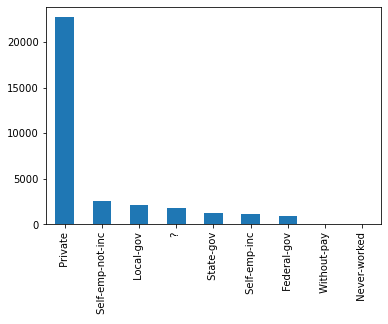

In [11]:
cat_Column(train_set["workclass"])

Unique data:  [' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' Assoc-voc' ' 7th-8th' ' Doctorate' ' Prof-school'
 ' 5th-6th' ' 10th' ' 1st-4th' ' Preschool' ' 12th'] 

Numberof unique data:  16 

What are values of unique data: 
  HS-grad         10501
 Some-college     7291
 Bachelors        5355
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: education, dtype: int64 

AxesSubplot(0.125,0.125;0.775x0.755)


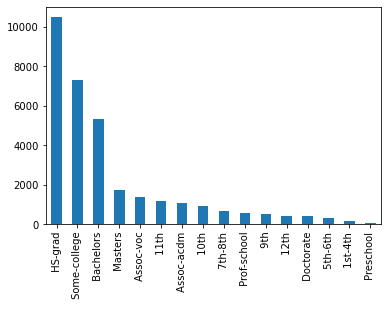

In [12]:
cat_Column(train_set["education"])

Unique data:  [' Never-married' ' Married-civ-spouse' ' Divorced'
 ' Married-spouse-absent' ' Separated' ' Married-AF-spouse' ' Widowed'] 

Numberof unique data:  7 

What are values of unique data: 
  Married-civ-spouse       14976
 Never-married            10683
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: marital_status, dtype: int64 

AxesSubplot(0.125,0.125;0.775x0.755)


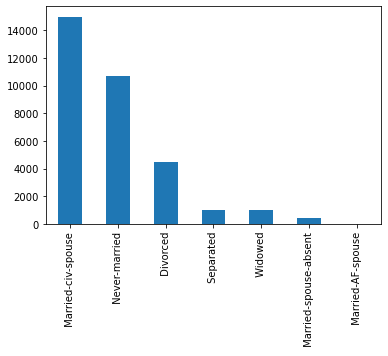

In [13]:
cat_Column(train_set["marital_status"])

Unique data:  [' Adm-clerical' ' Exec-managerial' ' Handlers-cleaners' ' Prof-specialty'
 ' Other-service' ' Sales' ' Craft-repair' ' Transport-moving'
 ' Farming-fishing' ' Machine-op-inspct' ' Tech-support' ' ?'
 ' Protective-serv' ' Armed-Forces' ' Priv-house-serv'] 

Numberof unique data:  15 

What are values of unique data: 
  Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3770
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: occupation, dtype: int64 

AxesSubplot(0.125,0.125;0.775x0.755)


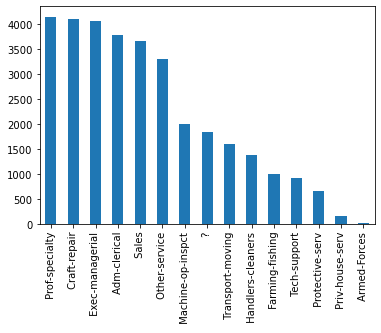

In [14]:
cat_Column(train_set["occupation"])

Unique data:  [' Not-in-family' ' Husband' ' Wife' ' Own-child' ' Unmarried'
 ' Other-relative'] 

Numberof unique data:  6 

What are values of unique data: 
  Husband           13193
 Not-in-family      8305
 Own-child          5068
 Unmarried          3446
 Wife               1568
 Other-relative      981
Name: relationship, dtype: int64 

AxesSubplot(0.125,0.125;0.775x0.755)


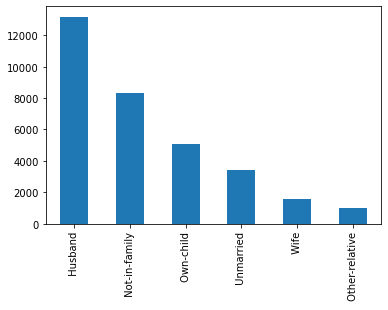

In [15]:
cat_Column(train_set["relationship"])

Unique data:  [' White' ' Black' ' Asian-Pac-Islander' ' Amer-Indian-Eskimo' ' Other'] 

Numberof unique data:  5 

What are values of unique data: 
  White                 27816
 Black                  3124
 Asian-Pac-Islander     1039
 Amer-Indian-Eskimo      311
 Other                   271
Name: race, dtype: int64 

AxesSubplot(0.125,0.125;0.775x0.755)


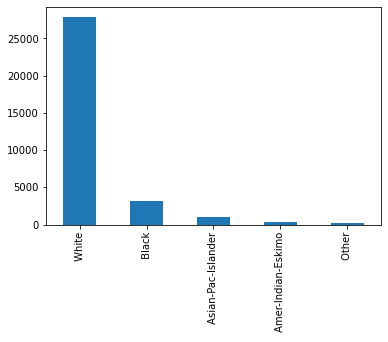

In [16]:
cat_Column(train_set["race"])

Unique data:  [' Male' ' Female'] 

Numberof unique data:  2 

What are values of unique data: 
  Male      21790
 Female    10771
Name: sex, dtype: int64 

AxesSubplot(0.125,0.125;0.775x0.755)


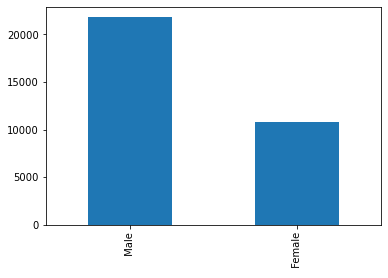

In [17]:
cat_Column(train_set["sex"])

Unique data:  [' Male' ' Female'] 

Numberof unique data:  2 

What are values of unique data: 
  Male      21790
 Female    10771
Name: sex, dtype: int64 

AxesSubplot(0.125,0.125;0.775x0.755)


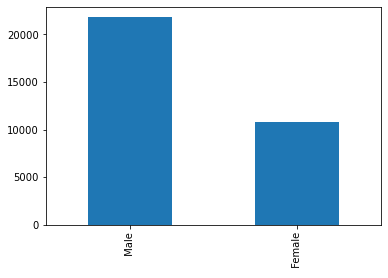

In [18]:
cat_Column(train_set["sex"])

Unique data:  [' <=50K' ' >50K'] 

Numberof unique data:  2 

What are values of unique data: 
  <=50K    24720
 >50K      7841
Name: wage_class, dtype: int64 

AxesSubplot(0.125,0.125;0.775x0.755)
 <=50K    75.92 %
 >50K     24.08 %
Name: wage_class, dtype: object


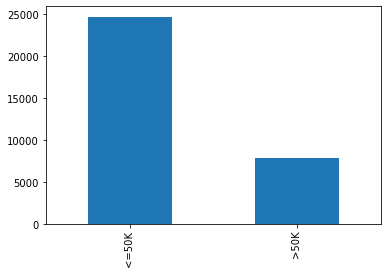

In [19]:
cat_Column(train_set["wage_class"]) # imbalance dataset
print(round(train_set["wage_class"].value_counts(normalize=True) * 100, 2).astype('str') + ' %')

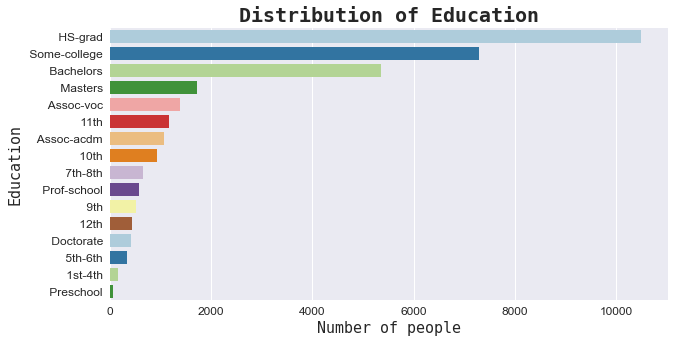

In [20]:
# Creating a barplot for 'Education'
edu = train_set['education'].value_counts()

plt.style.use('seaborn')
plt.figure(figsize=(10, 5))
sns.barplot(edu.values, edu.index, palette='Paired')
plt.title('Distribution of Education', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Number of people', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('Education', fontdict={'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=12)
plt.show()

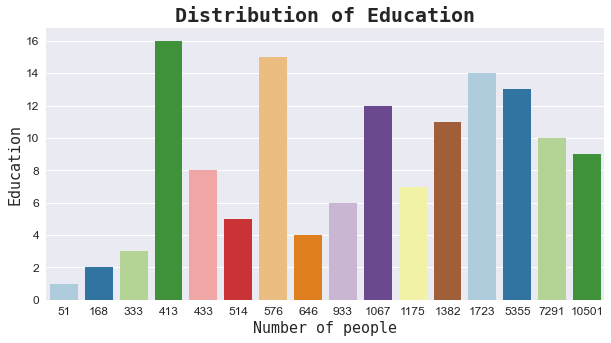

In [21]:
# Creating a barplot for 'Education'
edu = train_set['education_num'].value_counts()

plt.style.use('seaborn')
plt.figure(figsize=(10, 5))
sns.barplot(edu.values, edu.index, palette='Paired')
plt.title('Distribution of Education', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Number of people', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('Education', fontdict={'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=12)
plt.show()

In [22]:
train_set[["education","education_num"]].value_counts()

education      education_num
 HS-grad       9                10501
 Some-college  10                7291
 Bachelors     13                5355
 Masters       14                1723
 Assoc-voc     11                1382
 11th          7                 1175
 Assoc-acdm    12                1067
 10th          6                  933
 7th-8th       4                  646
 Prof-school   15                 576
 9th           5                  514
 12th          8                  433
 Doctorate     16                 413
 5th-6th       3                  333
 1st-4th       2                  168
 Preschool     1                   51
dtype: int64

In [23]:
#Drop Duplicated columns:

"""Here the education_num column is a numerical conversion of 'education'. 
    As the information is the same, we can delete the education column."""

train_set.drop(["education"], axis=1,inplace=True)

In [24]:
train_set.head()

,age,workclass,fnlwgt,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,39,State-gov,77516,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [25]:
# changing "?" with unknown
train_set['occupation'] = train_set['occupation'].str.replace('?', 'unknown')
train_set['workclass'] = train_set['workclass'].str.replace('?', 'unknown')
train_set['native_country'] = train_set['native_country'].str.replace('?', 'unknown')

In [26]:
#Find out distinct values in each columns
for feature in train_set:
    print(feature,':', train_set[feature].nunique())

age : 73
workclass : 9
fnlwgt : 21648
education_num : 16
marital_status : 7
occupation : 15
relationship : 6
race : 5
sex : 2
capital_gain : 119
capital_loss : 92
hours_per_week : 94
native_country : 42
wage_class : 2


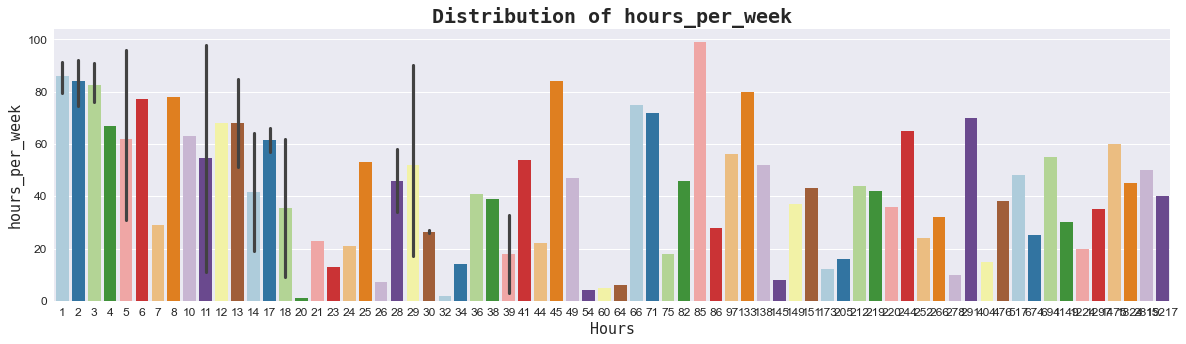

In [27]:
# Creating a barplot for 'Education'
edu = train_set['hours_per_week'].value_counts()

plt.style.use('seaborn')
plt.figure(figsize=(20, 5))
sns.barplot(edu.values, edu.index, palette='Paired')
plt.title('Distribution of hours_per_week', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Hours', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('hours_per_week', fontdict={'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=12)
plt.show()

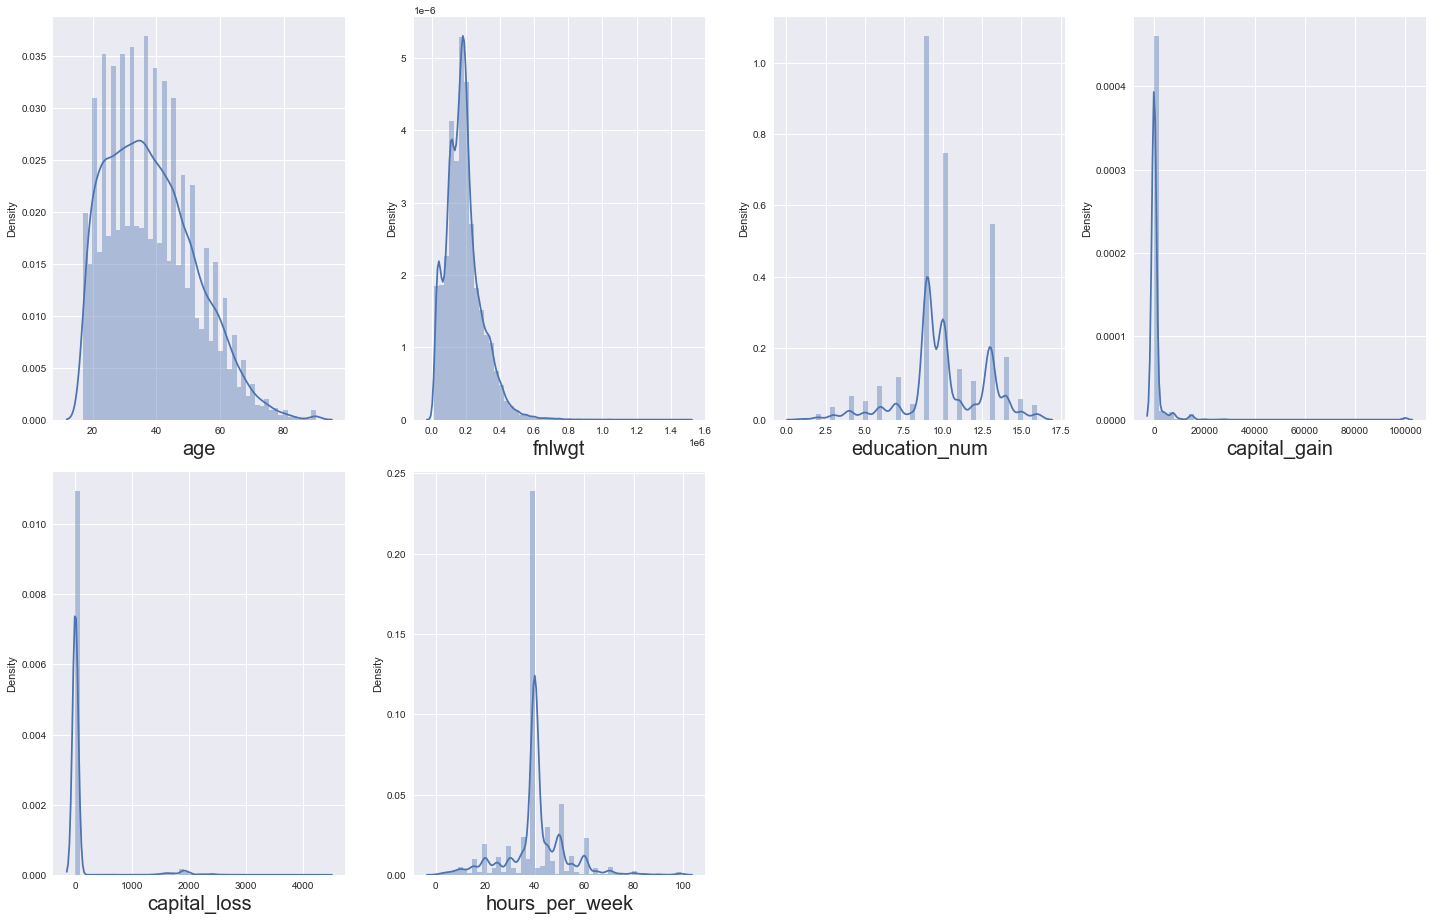

In [28]:
train_numerical_features = train_set.select_dtypes(include='number')

# let's see how data is distributed for every column
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in train_numerical_features:
    if plotnumber<=12 :
        ax = plt.subplot(4,4,plotnumber)
        sns.distplot(train_numerical_features[column])
        plt.xlabel(column,fontsize=20)
        
    plotnumber+=1
plt.tight_layout()



**In the numerical column the outlier are present but education_num,age,hours_per_week at some condition these columns are extreme values because a person if his age and hours per week both are some relation because base on age a person can work many hours, and education_num is one type of categorical column, which indicate the education of the person.** 

**capital_loss and capital_gain are for an individual person.  these column have outlier and rightside skew data.**

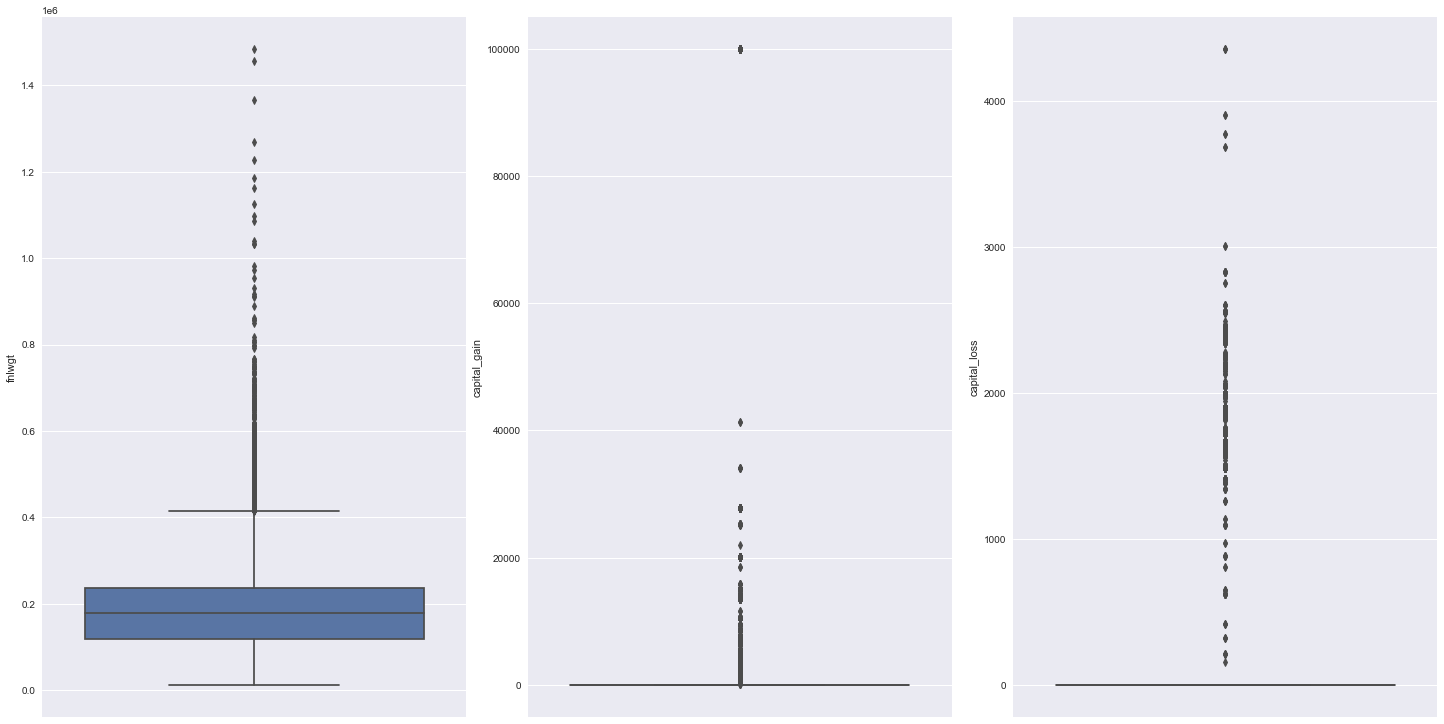

In [29]:
#Plotting by seaborn
x=train_set[['fnlwgt','capital_gain', 'capital_loss']]

# create a box plot
fig , ax = plt.subplots(ncols=3,nrows=1,figsize=(20,10))
index=0
ax = ax.flatten()

for col, value in x.items():
    sns.boxplot(y=col,data= x, ax = ax[index])
    index += 1
    
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)


# Outlier Treatment:

<AxesSubplot:>

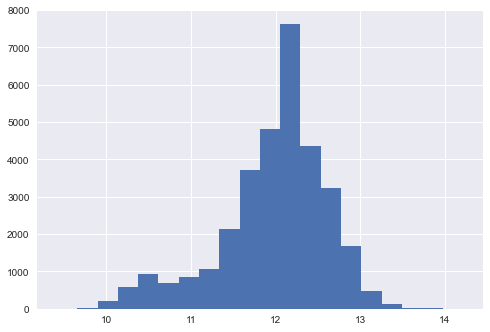

In [30]:
train_set['fnlwgt'] = np.log(train_set['fnlwgt'])

train_set['fnlwgt'].hist(bins=20) # Distribution After Log apply


## Applying log transformation to reduce the right side skewness.

In [32]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
columns = ['workclass', 'marital_status', 'occupation', 
           'relationship', 'race', 'sex', 'native_country',"wage_class"]

    
for column in columns:
    train_set[column] = LabelEncoder().fit_transform(train_set[column])    
    
    
#replace function or mapping function is also used  
train_set.head()

,age,workclass,fnlwgt,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,39,6,11.258240,13,4,0,1,4,1,2174,0,40,38,0
1,50,5,11.330336,13,2,3,0,4,1,0,0,13,38,0
2,38,3,12.281393,9,0,5,1,4,1,0,0,40,38,0
3,53,3,12.366153,7,2,5,0,2,1,0,0,40,38,0
4,28,3,12.732011,13,2,9,5,2,0,0,0,40,4,0


# Feature Selection:

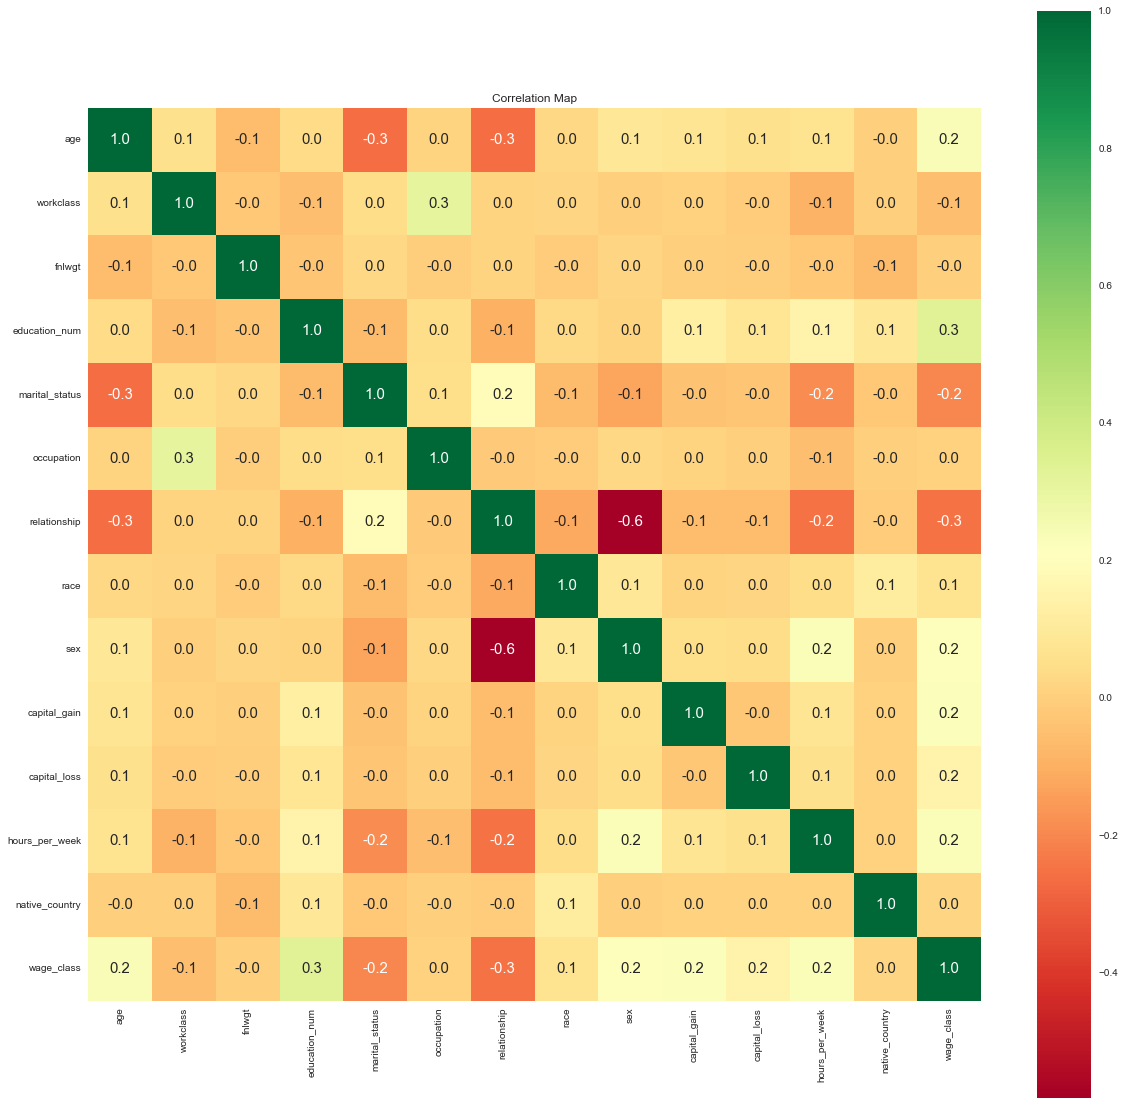

,age,workclass,fnlwgt,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
age,1.000000,0.059423,-0.060188,0.036527,-0.266288,0.012626,-0.263698,0.028718,0.088832,0.077674,0.057775,0.068756,-0.000176,0.234037
workclass,0.059423,1.000000,-0.023395,-0.054350,0.042236,0.312511,0.012817,0.018913,0.002306,0.010687,-0.009888,-0.093411,0.001253,-0.055124
fnlwgt,-0.060188,-0.023395,1.000000,-0.037585,0.025822,-0.002390,0.011122,-0.009102,0.019337,0.003564,-0.005085,-0.024333,-0.064860,-0.001373
education_num,0.036527,-0.054350,-0.037585,1.000000,-0.069304,0.044096,-0.094153,0.031838,0.012280,0.122630,0.079923,0.148123,0.090277,0.335154
marital_status,-0.266288,0.042236,0.025822,-0.069304,1.000000,0.052847,0.185451,-0.068013,-0.129314,-0.043393,-0.034187,-0.190519,-0.020456,-0.199307
occupation,0.012626,0.312511,-0.002390,0.044096,0.052847,1.000000,-0.014625,-0.009966,0.026116,0.012350,0.004540,-0.056995,-0.000479,0.010802
relationship,-0.263698,0.012817,0.011122,-0.094153,0.185451,-0.014625,1.000000,-0.116055,-0.582454,-0.057919,-0.061062,-0.248974,-0.010940,-0.250918
race,0.028718,0.018913,-0.009102,0.031838,-0.068013,-0.009966,-0.116055,1.000000,0.087204,0.011145,0.018899,0.041910,0.111296,0.071846
sex,0.088832,0.002306,0.019337,0.012280,-0.129314,0.026116,-0.582454,0.087204,1.000000,0.048480,0.045567,0.229309,0.003013,0.215980
capital_gain,0.077674,0.010687,0.003564,0.122630,-0.043393,0.012350,-0.057919,0.011145,0.048480,1.000000,-0.031615,0.078409,0.009651,0.223329


In [39]:
corr=train_set.corr()


# Plotting the heatmap of correlation between features
plt.figure(figsize=(20,20))
sns.heatmap(corr, cbar=True, square= True,cmap='RdYlGn', fmt='.1f', annot=True, annot_kws={'size':15})
plt.title('Correlation Map')
plt.show()

corr

In [43]:
train_set.shape

(32561, 14)

In [46]:
# Feature Selection Method:

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif #ANOVA(F-TEST)


# Separate the target column the from the dataset
X = train_set.drop(columns=['wage_class'])
y=train_set["wage_class"] 

print("Feature data dimension: ", X.shape)

#lr_list = range(0,11)
#or k in lr_list:

### Apply SelectKBest Algorithm
ordered_rank_features=SelectKBest(score_func=f_classif,k=13)
ordered_feature=ordered_rank_features.fit(X,y)

#create a dataframe
dfscores=pd.DataFrame(ordered_feature.scores_,columns=["Score"])
dfcolumns=pd.DataFrame(X.columns)

features_rank=pd.concat([dfcolumns,dfscores],axis=1)
features_rank.columns=['Features','Score']
lst=features_rank.sort_values(by=["Score"],ascending=False)

print("Feature listed by socore:","\n",lst,"\n")
print("Top 10 Features are :","\n",features_rank.nlargest(7,'Score'))
#By using SelectKbest method findding the top 10 features

Feature data dimension:  (32561, 13)
Feature listed by socore: 
           Features        Score
3    education_num  4120.095780
6     relationship  2187.645828
0              age  1886.707314
11  hours_per_week  1813.386282
9     capital_gain  1709.150064
8              sex  1593.107907
4   marital_status  1346.851776
10    capital_loss   754.830452
7             race   168.934788
1        workclass    99.237663
12  native_country    17.464773
5       occupation     3.799514
2           fnlwgt     0.061422 

Top 10 Features are : 
           Features        Score
3    education_num  4120.095780
6     relationship  2187.645828
0              age  1886.707314
11  hours_per_week  1813.386282
9     capital_gain  1709.150064
8              sex  1593.107907
4   marital_status  1346.851776


In [48]:
new_data=train_set[['education_num',
 'relationship',
 'age',
 'hours_per_week',
 'capital_gain',
 'sex',
 'marital_status',"wage_class"]]
new_data.head()


#By using feature selction method select the top 10 features which have highest score.

,education_num,relationship,age,hours_per_week,capital_gain,sex,marital_status,wage_class
0,13,1,39,40,2174,1,4,0
1,13,0,50,13,0,1,2,0
2,9,1,38,40,0,1,0,0
3,7,0,53,40,0,1,2,0
4,13,5,28,40,0,0,2,0


Count of each class: 
 0    24720
1     7841
Name: wage_class, dtype: int64


Percentage of each class :  
 0    75.919044
1    24.080956
Name: wage_class, dtype: float64
AxesSubplot(0.125,0.125;0.775x0.755)


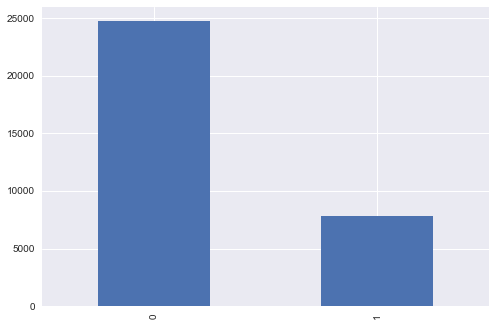

In [50]:
# Separate the target column the from the dataset
X = new_data.drop(columns=['wage_class'])
y=new_data["wage_class"] 

# for imabalne data set
print("Count of each class:","\n",y.value_counts()) # imbalnce dataset
# Percentage calculation
print("\n")
print("Percentage of each class : ","\n",(y.value_counts()/y.count())*100)
print(y.value_counts().plot(kind = 'bar'))

In [55]:
# MOdel Creation

from sklearn.preprocessing import StandardScaler


from sklearn.model_selection import train_test_split

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate

from sklearn import metrics

from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score

from sklearn.model_selection import RandomizedSearchCV

from sklearn.metrics import classification_report

from sklearn.metrics import plot_confusion_matrix

from xgboost import XGBClassifier

# ignore warnings
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 
%matplotlib inline

The number of classes before fit Counter({0: 24720, 1: 7841})
The number of classes after fit Counter({0: 24720, 1: 18540})


Count of each class after oversampling: 
 0    24720
1    18540
Name: wage_class, dtype: int64


Percentage of each class after oversampling :  
 0    57.142857
1    42.857143
Name: wage_class, dtype: float64
AxesSubplot(0.125,0.125;0.775x0.755)


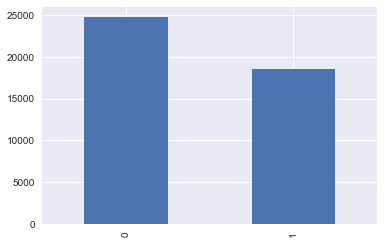

In [53]:
### Handle the imbalance dataset by using oversampling methods
###!pip install imblearn

from imblearn.over_sampling import RandomOverSampler

from collections import Counter

os=RandomOverSampler(0.75)

X_ov,y_ov=os.fit_resample(X,y)

print("The number of classes before fit {}".format(Counter(y))) # Before oversampling
print("The number of classes after fit {}".format(Counter(y_ov)))# After Oversamplig
print("\n")

print("Count of each class after oversampling:","\n",y_ov.value_counts()) # balance dataset
print("\n")
print("Percentage of each class after oversampling : ","\n",(y_ov.value_counts()/y_ov.count())*100)
print(y_ov.value_counts().plot(kind = 'bar'))


In [54]:
print("Split the data into training and test set")
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_ov,y_ov, test_size=0.25, random_state=355)

# For model training and evaluation

print('X_train columns : {a} and Rows : {b}'.format(a=X_train.shape[1],b=X_train.shape[0]))
print('X_test columns : {a} and Rows : {b}'.format(a=X_test.shape[1],b=X_test.shape[0]))

Split the data into training and test set
X_train columns : 7 and Rows : 32445
X_test columns : 7 and Rows : 10815


## Model:XGBClassifier

In [85]:
#xgb_model = XGBClassifier(objective='binary:logistic')
classifier = XGBClassifier()
# XGBClassifier model

In [86]:
## Hyper Parameter Optimization

params={
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
    
}

random_search=RandomizedSearchCV(classifier,
                                 param_distributions=params,n_iter=5,scoring='roc_auc',
                                 n_jobs=-1,cv=5,verbose=3)
print("Parameters: ",random_search.fit(X_train,y_train))
# Fit the train dataset to get better parameteres
print("\n")
best_parameters = random_search.best_params_
print("The Parameters are :",best_parameters)
print("\n")
print("Mean cross-validated score of the best_estimator:",random_search.best_score_ )



Fitting 5 folds for each of 5 candidates, totalling 25 fits
Parameters:  RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, gamma=None,
                                           gpu_id=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate=None, max_bin=None,...
                                           n_estimators=100, n_jo

In [87]:
#xgb_model = XGBClassifier(objective='binary:logistic')
xgb_model = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.4, gamma=0.1, learning_rate=0.3,
       max_delta_step=0, max_depth=12, min_child_weight=1,
       n_estimators=100, n_jobs=1,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, silent=True,
       subsample=1)
# XGBClassifier model

#Fit the train datapoints in AdaBoostClassifier model

print(xgb_model.fit(X_train,y_train))

# predict the X_test data set and find the predictited value
y_pred= xgb_model.predict(X_test)

print("Training accuracy",accuracy_score(y_train,xgb_model.predict(X_train))*100)
print("Testing accuracy",accuracy_score(y_test,y_pred)*100)

[22:23:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.4,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0.1, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.3, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=12, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              

In [88]:
a_Test=pd.DataFrame({'Real Values test':y_test, 'Predicted Values test ':y_pred})
a_Test.head()
# Compare the test and predicted output

,Real Values test,Predicted Values test
27836,0,0
42902,1,0
32418,0,0
37897,1,1
23824,0,0


XGBClassifier MODEL PERFORMANCE MATRIX(CONFUSION MATRIX):
1.Confusion_Matrix :  
 [[5094  986]
 [ 777 3958]]


plot_confusion_matrix:


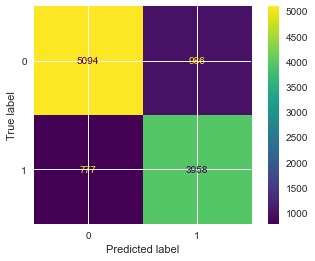

2.Confusion_matrix accuracy : 0.8369856680536292
3.Confusion_matrix precision : 0.8005663430420712
4.Confusion_matrix recall : 0.8359028511087645
5.Confusion_matrix f1_score : 0.8178530839962805
6.Classification Report : 
               precision    recall  f1-score   support

           0       0.87      0.84      0.85      6080
           1       0.80      0.84      0.82      4735

    accuracy                           0.84     10815
   macro avg       0.83      0.84      0.84     10815
weighted avg       0.84      0.84      0.84     10815



In [89]:
print("XGBClassifier MODEL PERFORMANCE MATRIX(CONFUSION MATRIX):")

#accuracy_ada=round(metrics.accuracy_score(y_test,y_pred_ada),2)
accuracy=metrics.accuracy_score(y_test,y_pred)
recall= metrics.recall_score(y_test,y_pred)
Precision=metrics.precision_score(y_test,y_pred)
f1_score=metrics.f1_score(y_test,y_pred)
cf_matrix = confusion_matrix(y_true = y_test, y_pred = y_pred)

print("1.Confusion_Matrix : ","\n",cf_matrix)
print("\n")
print("plot_confusion_matrix:")
plot_confusion_matrix(xgb_model, X_test, y_test)  
plt.show()

print("2.Confusion_matrix accuracy :",accuracy)
print("3.Confusion_matrix precision :",Precision)
print("4.Confusion_matrix recall :",recall)
print("5.Confusion_matrix f1_score :",f1_score)
print("6.Classification Report :","\n",classification_report(y_test, y_pred))

In [90]:
# save the model to disk
## import the module:

import pickle
from pathlib import Path

filepath = r'C:/Users/sony/A_MACHINE LEARNING AND DEEP LEARNING- INEURON/INEURON-PYTHON ASSIGNMENT/XGBOOST/XGboost_assignment_final/XGBOOST_Classifier_pickle.pckl'
pickle.dump(xgb_model, open(filepath, 'wb'))
pickle.load(open(filepath, 'rb'))

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.4,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0.1, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.3, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=12, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=1, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)